## Grape fruit disease detector

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import tensorflow as tf
import keras
from matplotlib.image import imread

%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\Mohamed'

In [53]:
data_folder = r'E:\Programming\ML\Datasets\Grape Disease Dataset\Original Data'
os.listdir(data_folder)

['test', 'train', 'val']

In [5]:
os.chdir(data_folder)

In [6]:
os.getcwd()

'E:\\Programming\\ML\\Datasets\\Grape Disease Dataset\\Original Data'

In [22]:
import splitfolders

In [23]:
splitfolders.ratio(input=data_folder + 'train',
                  output='val' , ratio=(0.8 , 0.2) , move=True)

Copying files: 7222 files [00:04, 1787.88 files/s]


In [54]:
os.listdir(data_folder)

['test', 'train', 'val']

In [8]:
os.listdir(data_folder + 'val')

['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']

In [39]:
train_path = data_folder + 'train\\'
val_path   = data_folder + 'val\\'
test_path = data_folder + 'test\\'

print(train_path )
print(val_path)
print(test_path)

E:\Programming\ML\Datasets\Grape Disease Dataset\Original Data\\train\
E:\Programming\ML\Datasets\Grape Disease Dataset\Original Data\\val\
E:\Programming\ML\Datasets\Grape Disease Dataset\Original Data\\test


In [40]:
os.listdir(train_path + 'ESCA')[0]

'00b65fe8-cee1-4b68-8ef4-1211814f2845___FAM_B.Msls 3990.JPG'

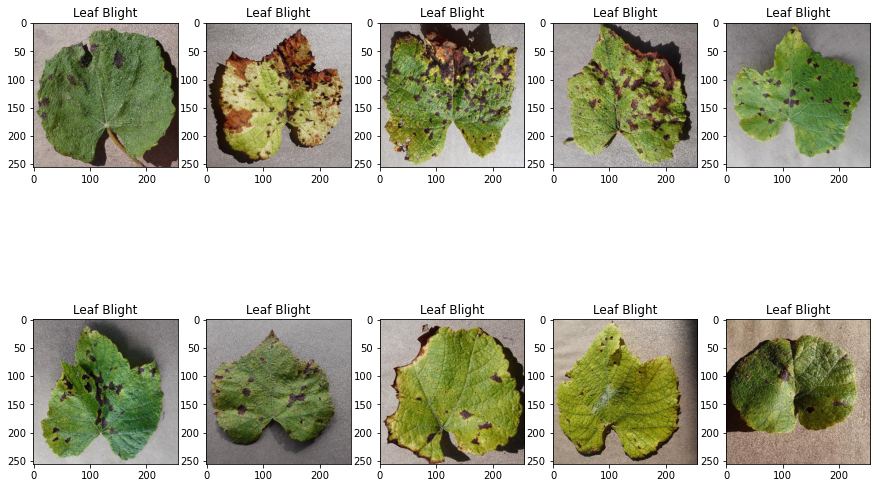

In [66]:
plt.figure(figsize=(15 , 10))

for i in range(5):
    
    test_category =  random.choice(os.listdir(test_path))
    image_path = os.path.join(test_path , test_category)

    for i in range (10):

            file = random.choice(os.listdir(image_path))

            image = os.path.join(image_path , file)

            img = imread(image)

            ax = plt.subplot(2 , 5 , i+1)

            ax.title.set_text(test_category)

            plt.imshow(img)


In [45]:
os.listdir(image_path)[0]

'00090b0f-c140-4e77-8d20-d39f67b75fcc___FAM_B.Rot 0376.JPG'

In [19]:
IMG_SHAPE = (224 , 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                                image_size= IMG_SHAPE,
                                                                label_mode='categorical')

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                                image_size= IMG_SHAPE,
                                                                label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                                image_size= IMG_SHAPE,
                                                                label_mode='categorical',
                                                               shuffle=False)



Found 5776 files belonging to 4 classes.
Found 1446 files belonging to 4 classes.
Found 1805 files belonging to 4 classes.


In [28]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [32]:
model= Sequential()

model.add(layers.Conv2D(32 , kernel_size=(3,3) , input_shape= (224, 224 ,3) , activation= 'relu'))
model.add(layers.Conv2D(16 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.Conv2D(16 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.Conv2D(16 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.Conv2D(16 , kernel_size=(3,3) , activation= 'relu'))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())

model.add(layers.Dense(len(train_data.class_names) , activation='softmax'))
          

model.compile(loss= tf.keras.losses.categorical_crossentropy,
         optimizer= tf.keras.optimizers.Adam(),
         metrics= ['accuracy'])


In [33]:
model_1_history = model.fit(train_data, 
                            validation_data= val_data,
                            epochs= 5)

Epoch 1/5
181/181 [==============================] - 50s 188ms/step - loss: 0.7641 - accuracy: 0.6998 - val_loss: 0.7623 - val_accuracy: 0.7870
Epoch 2/5
181/181 [==============================] - 26s 140ms/step - loss: 0.2608 - accuracy: 0.9025 - val_loss: 0.1823 - val_accuracy: 0.9308
Epoch 3/5
181/181 [==============================] - 26s 140ms/step - loss: 0.1598 - accuracy: 0.9392 - val_loss: 0.1006 - val_accuracy: 0.9682
Epoch 4/5
181/181 [==============================] - 26s 142ms/step - loss: 0.1202 - accuracy: 0.9598 - val_loss: 0.1544 - val_accuracy: 0.9426
Epoch 5/5
181/181 [==============================] - 27s 149ms/step - loss: 0.0954 - accuracy: 0.9659 - val_loss: 0.1398 - val_accuracy: 0.9537


In [34]:
model.evaluate(test_data)

57/57 [==============================] - 9s 150ms/step - loss: 0.1317 - accuracy: 0.9540


[0.1317073106765747, 0.9540166258811951]